<a href="https://colab.research.google.com/github/byui-cse/cse380-notebooks/blob/master/11_2_Ponder_and_Prove_Verifying_Graph_Properties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ponder and Prove Verifying Graph Properties
## Due: Saturday, 20 March 2021, 11:59 pm

## Introduction

The goal of this assignment is to investigate verifying certain properties of graphs. This is an opportunity to apply your knowledge of complete graphs, graph representations, and subgraphs.

Another name for a complete graph is a word that in high school is often mispronounced as **click**. Making it rhyme with the second syllable of the words **antique** or **technique** is the correct way to pronounce **clique**.

Think about how to **verify** this graph property, **and its opposite**.

To give an operational definition, a clique is a subgraph of a given graph in which every two nodes are connected by a link. An **anti**-clique is a subgraph in which every two nodes are **not** connected by a link. (Note that this is the same as saying that **no** two nodes in this subgraph are connected. Or in other words, they form an **independent set** of nodes --- nodes that are all independent of each other.) Searching through a specified graph, a verifier would check the alleged "clique-ness" or "anti-clique-ness" of a given list of nodes.

Use the code below as a starting point. Decide how to represent a graph. Use the ```link_exists``` predicate as is, or change it to suit. If you decide as is is good enough, you will still need to implement the ```get_adjacency_list``` function. Test several graphs and various-sized candidate node lists (see below) using a suitably implemented ```check_clique_or_anti_clique``` function.

## Caution

Be aware that a possible misconception is that finding the maximal clique in an undirected graph using something like the Bron-Kerbosch algorithm is a clever strategy for this assignment. Not so! Please do not reach this conclusion, which stems from a fundamental misunderstanding of what this assignment is all about.

## TODO Test Graphs with Candidate Node Lists

There are six test graphs containing from 27 up to just over one million (1,000,000) links. Each line of the input file represents one link, consisting of two nonnegative integers that represent the nodes of the link. All graphs are connected, and the numbers are contiguous from 0 to $n$, where $n$ is some number less than or equal to 60,000. Contiguous means, for example, the nodes 1, 2, 3, 4, 5 and 10, (or any list with gaps) will not occur. However, the nodes may not appear in sorted order in the file, so don't assume they will.

Execute the following code block to get the test graph files:

In [1]:
!curl -O https://rickneff.github.io/testgraphfiles.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 75 7010k   75 5283k    0     0  5283k      0  0:00:01 --:--:--  0:00:01 6260k
100 7010k  100 7010k    0     0  7010k      0  0:00:01  0:00:01 --:--:-- 6503k


Your task is to figure out how this code should work, and supply what it lacks to make it work.

In [1]:
from itertools import product
from io import BytesIO
from zipfile import ZipFile
# For Graphing and display
from graphviz import Graph
from IPython.display import Image, display
from itertools import repeat
from functools import cache


def make_link(node1, node2):
  """make link a tuple with lower node number first
  """
  return tuple([node1, node2]) if node1 < node2 else tuple([node2, node1])

# This is the slow way (takes almost a minute to verify 24 tests)
# by having a graph represented by a list of its links.
# See if you can do better!
def read_graph(zip_file, N):
  contents = BytesIO(zip_file.read('testgraphfiles/graph' + str(N) + '.in'))
  graph = []
  for line in contents:
    node1, node2 = map(int, line.split())
    link = make_link(node1, node2)
    graph.append(link)
  return graph

## My Version
def read_graph_for_graphing(zip_file, N):
  contents = BytesIO(zip_file.read('testgraphfiles/graph' + str(N) + '.in'))
  graph = []
  graph_dict = {}
  for line in contents:
    node1, node2 = map(int, line.split())
    if(node1 in graph_dict.keys()):
      adjs = graph_dict.get(node1)
      adjs += [node2]
      graph_dict[node1] = adjs
    else: 
      graph_dict[node1] = [node2]
  return graph_dict

## My Version
@cache
def read_graph3(zip_file, N):
  contents = BytesIO(zip_file.read('testgraphfiles/graph' + str(N) + '.in'))
  graph = []
  graph_dict = {}
  for line in contents:
    node1, node2 = map(int, line.split())
    if(node1 in graph_dict.keys()):
      adjs = graph_dict.get(node1)
      adjs += [node2]
      graph_dict[node1] = adjs
    else: 
      graph_dict[node1] = [node2]

    if(node2 in graph_dict.keys()):
      adjs = graph_dict.get(node2)
      adjs += [node1]
      graph_dict[node2] = adjs
    else: 
      graph_dict[node2] = [node1]
  return graph_dict

# Used to Visualize Graph
def make_graph(graph):
  nodes = graph.keys()
  edges = []
  for node in graph.keys():
    for adjacent_node in graph.get(node):
      edges.append((str(node) , str(adjacent_node)))
  # Initialize Graph
  dot = Graph(format="png", engine="Circo") # Circo,fdp,neato,twopi
  # Create Nodes
  for node in nodes:
    dot.node(str(node))
  # Create Edges
  dot.edges(edges)
  dot.render('test_graph', view=True)
  display(Image('test_graph.png'))

# See above for one way to implement this, but certainly
# not the only way, nor even the best way, perhaps.
def link_exists(graph, node1, node2):
  """Does a link exist between node1 and node2 in graph?
  """
  return node1 in graph.get(node2)
  
# Make use of link_exists, of course, but also the product
# function imported from itertools.
def check_clique_or_anti_clique(graph, nodes, anti):
  """Checks if the graph contains a subgraph consisting of
     the given nodes that is a clique (if anti is False) Not anti
     or an anti-clique (if anti is True). Returns True or
     False appropriately.
  """
  # Not any should be linked in a anti-clique 
  # They should all be linked in a clique
  result = [link_exists(graph,x,y) for x in nodes for y in nodes if x != y]
  return not any(result) if anti else all(result)

graph_test_dict = {
    1: [
        [2, 3, 4, 10, 11], True, False,
        [2, 4, 5, 10, 11], False, False,
        [1, 3, 5, 8], False, True,
        [4, 5, 8, 11], False, False
    ],
    2: [
        [251, 417, 517], True, False,
        [414, 587, 588], True, False,
        [8, 10, 14, 17, 20, 49, 51, 66, 74, 80, 84, 109, 124, 127, 129, 132, 139, 141, 143, 150, 154, 161, 168, 177, 192, 196, 200, 203, 207, 215, 218, 239, 259, 261, 272, 278, 285, 292, 298, 302, 309, 312, 315, 320, 338, 343, 356, 368, 372, 380, 391, 395, 397, 402, 407, 415, 418, 427, 429, 434, 441, 448, 458, 461, 465, 470, 475, 480, 482, 494, 498, 512, 516, 549, 560, 570, 582], False, True,
        [17, 290, 129, 212, 354, 497, 192, 381, 389, 112, 386, 341], False, False
    ],
    3: [
	    [212, 320, 357, 463, 690], True, False,
	    [266, 606, 990, 243, 11], True, False,
	    [534, 787, 579, 430, 849, 399, 561, 798, 72, 623, 422, 197, 8, 336, 1001, 401, 173, 862, 716, 117, 17, 175, 123, 317, 521, 246], False, True,
	    [12, 235, 198, 199, 264, 345, 444, 501, 672, 734, 908], False, False
    ],
    4: [
	    [664, 1026, 1171], True, False,
	    [838, 1184, 1055, 1480], True, False,
	    [2, 4, 7, 9, 12, 15, 17, 20, 23, 29, 33, 35, 43, 48, 53, 57], False, False,
	    [237, 820, 1665, 301, 453, 952, 1864, 710, 266, 1177, 1798, 392, 339, 1492, 1652, 483, 798, 745, 975, 1638, 1035, 1483, 1065, 1336, 1601, 1567, 1839, 2001, 802, 1456, 434, 504, 1754, 1524, 1889, 1624, 104, 1449, 1322, 1343, 88, 1118, 341, 762, 1311, 599, 993, 280, 288, 792, 1361], False, True
    ],
    5: [
	    [791, 1516, 1938, 2233], True, False,
	    [836, 2406, 2489, 583, 584], True, False,
	    [911, 1014, 1665, 2297, 1363, 314, 1548, 1469, 743, 622, 1408, 1288, 2228, 545, 1313, 1962, 1509, 1329, 1978, 149, 1945, 1959, 552, 2069, 394, 856, 1, 2171, 888, 2269, 2032, 77, 2494, 646, 1214, 1381], False, True,
	    [15, 18, 110, 246, 314, 981], False, False
    ],
    6: [
	    [157, 1995, 2059, 2060, 2165, 2511], True, False,
	    [1787, 1300, 52, 2141, 1812, 1184, 695], True, False,
	    [666, 848, 1861, 949, 959, 1728, 1540, 1384, 1412, 2170, 2374, 260, 1519, 2417, 2342, 2738, 2492, 2233, 2041, 2799, 2628, 701, 1498, 589, 2160, 396, 1223, 1962], False, True,
	    [2, 7, 18, 28, 45, 90, 459, 571, 888, 905, 1312, 1450], False, False
    ]
}

def run_tests(test_only):
  with ZipFile('testgraphfiles.zip') as zfile:
    for N in graph_test_dict:
      graph = read_graph3(zfile, N)
      if not test_only:
        print(f'Verifying graph {N}:\n')
      for n in range(4):
        index = 3 * n
        nodes = graph_test_dict[N][index]
        expected_clique = graph_test_dict[N][index + 1]
        expected_anticl = graph_test_dict[N][index + 2]
        clique = check_clique_or_anti_clique(graph, nodes, False)
        anticl = check_clique_or_anti_clique(graph, nodes, True)
        if test_only:
          assert(expected_clique == clique)
          assert(expected_anticl == anticl)
        else:
          print(f'{nodes}\n     Clique: {clique}\nAnti-clique: {anticl}\n')

In [2]:
%timeit run_tests(True)

1.85 s ± 20.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


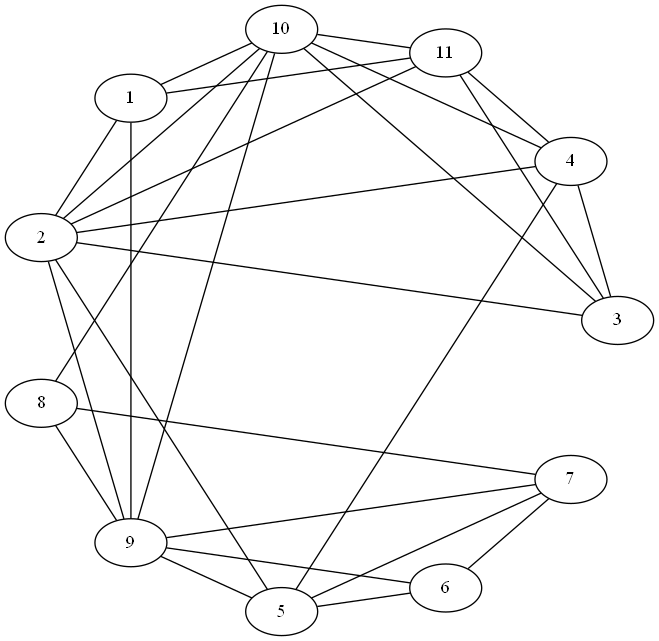

In [4]:
with ZipFile('testgraphfiles.zip') as zfile:
      graph = read_graph_for_graphing(zfile, 1)
      make_graph(graph)

<img src="test_graph.png">

# TODO My Report on What I Did and What I Learned

## Fun


I had fun with this assignment. I was exploring initially different techniques for storing the graph. I originally tried a few other methods because I was curious what would be most efficient. I thought a fun solution would be to create an adjacency list using a Godel Hash. However, this provided grossly inefficient and instead, I used a dictionary that worked out quite well. I additionally desired to graph each one of the graphs in the zip files before realizing that they consist of mostly large graphs with more than 10,000 connections, which takes a long time to create.

## New

Newly Learned:
I also tried a few items like trying to do it within a map, however, I decided it wasn't exactly very clean to go about it. So instead, I found that a list comprehension method was best. However, when exploring maps further I learned how to write more complicated maps using itertools functions like repeat() and how to do a map on inner elements by doing an embedded map within a map. This provided to be hard to read but it was fun to explore before I disregarded it as a good solution. And it made me significantly more confident in working with maps. I definitely want to explore this more in the future as my solutions tend to often be loopier.

## Meaningful


MeaningFul: 
As I mentioned in other sections, I learned many things I consider meaningful. I explored topics like maps, repeat, Godel Hashing, Graphviz, and other topics when going through this problem. Some of these items were more out of curiosity instead of trying to solve the problem. I was able to explore many questions I had and I enjoyed the assignment overall.

## Other

Connections:
One connection I made was related to Godel Hashing and how we might be able to store an adjacency list in a Godel Hash by assigning an nth prime value to each node. This was fun and I implemented it but it took longer than a minute to run one of these tests because there are many multiplications and divisions required is what I realized, which made this method quite expensive and a bad choice in my mind. I also took into account a lot thinking carefully about how to be most efficient when creating my algorithm and exploring a few possible avenues. My simplest solution proved to be most fruitful.

Collaborators:
I worked with Jack Leung and discussed the problem. I shared my ideas and we went over the approaches we took until we were satisfied with our solutions for the Ponder and Prove. It was interesting to hear how each of us approached the problem differently.

# TODO What is True?
Click on each warranted checkbox to toggle it to True (or back to False). 

NOTE: *This only works in Colab. If you run it in some other Jupyter notebook client/server environment you may have to change False to True (or vice versa) manually.*

This self-assessment is subject to revision by a grader.

In [5]:
#@markdown ## What is True about what I did?
#@markdown ### I had fun.
cb00 = True #@param {type:'boolean'}
#@markdown ### I learned something new.
cb01 = True #@param {type:'boolean'}
#@markdown ### I achieved something meaningful, or something I can build upon at a later time.
cb02 = True #@param {type:'boolean'}
#@markdown ## What is True about my report?
#@markdown ### I wrote a sufficient number of well-written sentences.
cb03 = True #@param {type:'boolean'}
#@markdown ### My report is free of mechanical infelicities.
cb04 = True #@param {type:'boolean'}
#@markdown ### I used Grammarly (or something better described in my report) to check for MIs.
cb05 = True #@param {type:'boolean'}
#@markdown ### I reported on any connections I found between these problems and something I already know. 
cb06 = True #@param {type:'boolean'}
#@markdown ### I reported who were and what contribution each of my collaborators made.
cb07 = True #@param {type:'boolean'}
#@markdown ## What is True about my code's size?
#@markdown ### I created a body for "link_exists" that is no more than 2 lines (not greater than 75 characters each).
cb08 = True #@param {type:'boolean'}
#@markdown ### I created a body for "check_clique_or_anti_clique" that is no more than 6 lines (not greater than 75 characters each).
cb09 = True #@param {type:'boolean'}
#@markdown ### I created a body for "check_clique_or_anti_clique" that is no more than 5 lines (not greater than 75 characters each).
cb10 = True #@param {type:'boolean'}
#@markdown ### I created a body for "check_clique_or_anti_clique" that is no more than 4 lines (not greater than 75 characters each).
cb11 = True #@param {type:'boolean'}
#@markdown ### I created a body for "check_clique_or_anti_clique" that is no more than 3 lines (not greater than 75 characters each).
cb12 = True #@param {type:'boolean'}
#@markdown ### I created a body for "check_clique_or_anti_clique" that is no more than 2 lines (not greater than 75 characters each).
cb13 = True #@param {type:'boolean'}
#@markdown ## What is True about my code's efficiency?
#@markdown ### My code is efficient enough to run all 4 tests on all 6 graphs in less than 5 minutes.
cb14 = True #@param {type:'boolean'}
#@markdown ### My code is efficient enough to run all 4 tests on all 6 graphs in less than 2 minutes.
cb15 = True #@param {type:'boolean'}
#@markdown ### My code is efficient enough to run all 4 tests on all 6 graphs in less than 1 minute.
cb16 = True #@param {type:'boolean'}
#@markdown ### My code is efficient enough to run all 4 tests on all 6 graphs in less than 30 seconds.
cb17 = True #@param {type:'boolean'}
#@markdown ### My code is efficient enough to run all 4 tests on all 6 graphs in less than 15 seconds.
cb18 = True #@param {type:'boolean'}
#@markdown ### My code is efficient enough to run all 4 tests on all 6 graphs in less than 5 seconds.
cb19 = True #@param {type:'boolean'}

## DO NOT CHANGE ANYTHING IN THE NEXT CODE CELL!!
### Delete this cell and the following ones before submitting your work.

In [6]:
points_for_what_I_did = [5]*3
points_for_my_report = [8]*5
points_for_my_code_size = [5]*6
points_for_my_code_efficiency = [2]*4 + [3,4]
points = points_for_what_I_did + points_for_my_report + points_for_my_code_size + points_for_my_code_efficiency
# cb is short for checkbox
total = sum(map(lambda n, p: p if eval(f'cb{n:02}') else 0,
                range(len(points)), points))             
total

100

# For graders